# Assignment

In [1]:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.datasets import fetch_california_housing
import seaborn as sns

%matplotlib inline

from IPython.display import Image

Problem 1. Train the polynomial regression model for the following problem with degrees 1, 4, 15. For degree 15, train a model with regularization. Try different regularization options. Make conclusions.

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def polynomial_regression(X, y, degree, regularization=None, cv=5):
    if regularization == 'lasso':
        model = LassoCV(cv=cv, max_iter=50000, alphas=np.logspace(-3, 3, 100))
    elif regularization == 'ridge':
        model = RidgeCV(cv=cv, alphas=np.logspace(-3, 3, 100))
    elif regularization == 'elastic_net':
        model = ElasticNetCV(cv=cv, max_iter=50000, alphas=np.logspace(-3, 3, 100))
    else:
        model = LinearRegression()

    pipeline = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), model)
    pipeline.fit(X.reshape(-1, 1), y)
    return pipeline


def plot_model(X_train, y_train, X_test, y_test, X_plot, y_pred_curve, title):
    plt.scatter(X_train, y_train, color="red", label="train set", marker='o')
    plt.scatter(X_test, y_test, color="blue", label="test set", marker='x')
    plt.plot(X_plot, y_pred_curve, color="black", label="fit")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()


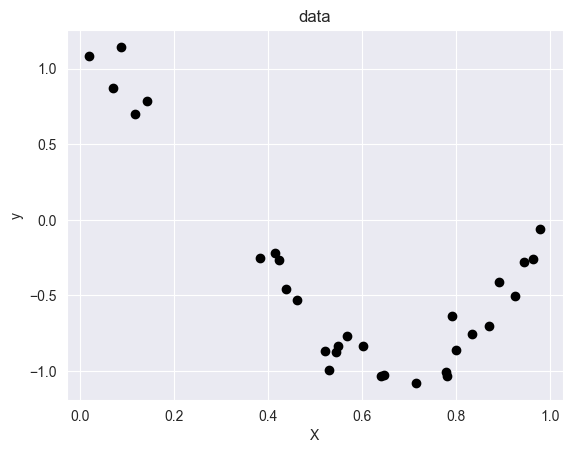

In [3]:
np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X, y, color='black')
plt.xlabel('X')
plt.ylabel('y')
plt.title('data')
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
models = {
    "Degree 1": polynomial_regression(X_train, y_train, 1),
    "Degree 4": polynomial_regression(X_train, y_train, 4),
    "Degree 15": polynomial_regression(X_train, y_train, 15),
    "Degree 15 Lasso": polynomial_regression(X_train, y_train, 15, 'lasso', 5),
    "Degree 15 Ridge": polynomial_regression(X_train, y_train, 15, 'ridge', 5),
    "Degree 15 ElasticNet": polynomial_regression(X_train, y_train, 15, 'elastic_net', 5)
}

In [6]:
X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
results = []
predictions = {}

for name, model in models.items():
    y_pred_test = model.predict(X_test.reshape(-1, 1))
    y_pred_curve = model.predict(X_plot)

    results.append({
        "Model": name,
        "R^2": r2_score(y_test, y_pred_test),
        "MSE": mean_squared_error(y_test, y_pred_test)
    })

    predictions[name] = y_pred_curve

df_results = pd.DataFrame(results)
df_results.round(2)

,Model,R^2,MSE
0,Degree 1,0.61,0.17
1,Degree 4,0.96,0.02
2,Degree 15,0.86,0.06
3,Degree 15 Lasso,0.95,0.02
4,Degree 15 Ridge,0.96,0.02
5,Degree 15 ElasticNet,0.95,0.02


1. Polynomial regression of degree 1 demonstrates its inefficiency, since it is essentially linear regression, which cannot capture the curve. Only 61% of the variance is explained, and the MSE is quite high - 0.17. For this particular task this model is too simple.
2. Polynomial regression of degree 4 shows high efficiency. It's well-balanced with an excellent $R^2$ score - 0.96 and very low MSE - 0.02
3. Polynomial regression of degree 15 is too complex for this task as the $R^2$ score is lower - 0.86, so the model is overfitting. This is expected as we trained our model on only 30 samples (minus 20% for testing), which is not enough for a polynomial of this high degree.
4. Polynomial regressions of degree 15 with regularization (lasso, ridge, elastic net) show better efficiency due to usage of regularization, even though polynomial degree with degree 15 without regularization was overfitting. Usage of regularization with cross-validation to find the best alpha helped to reduce overfitting by controlling the weights of the features.

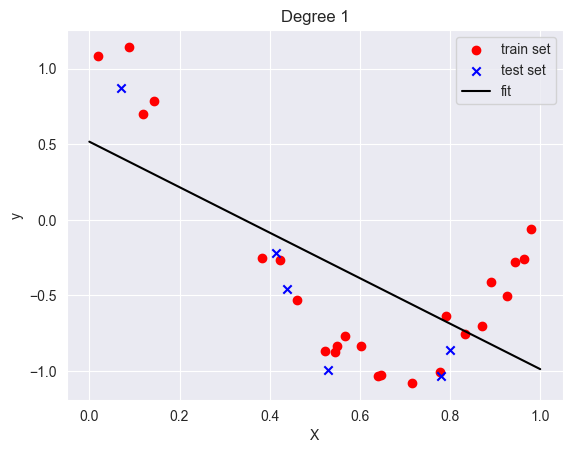

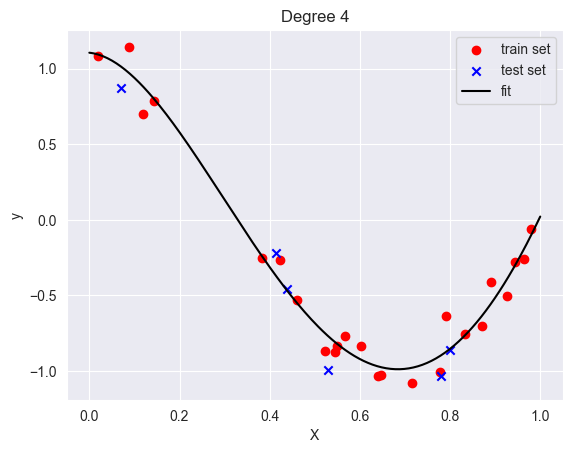

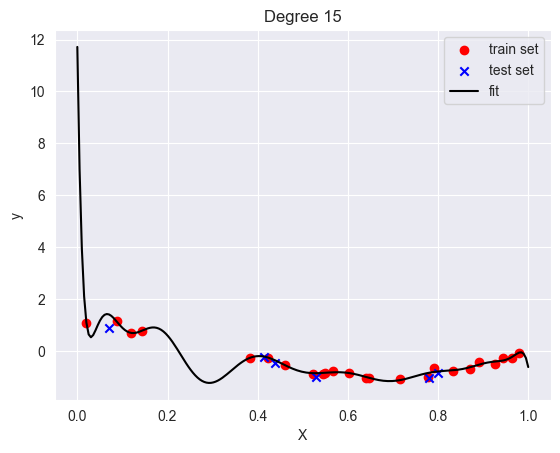

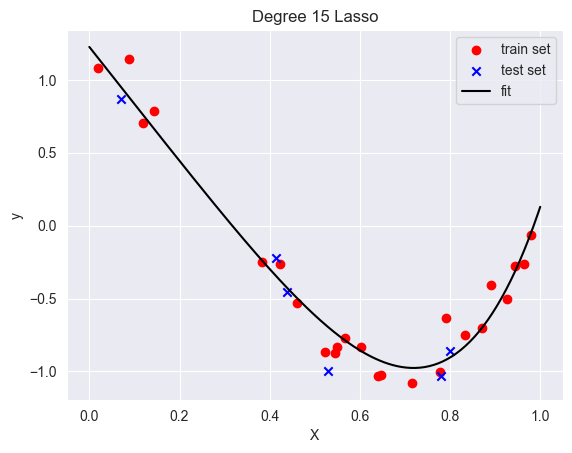

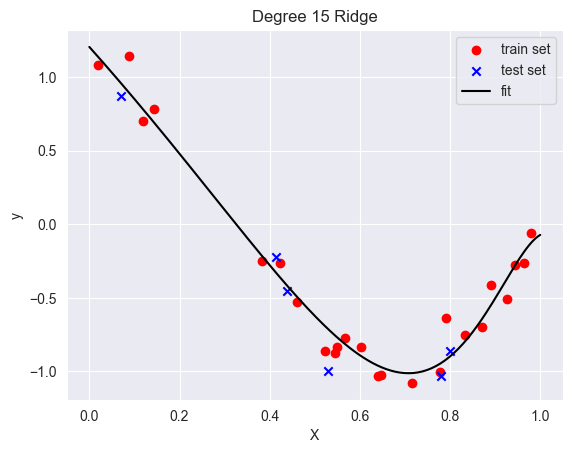

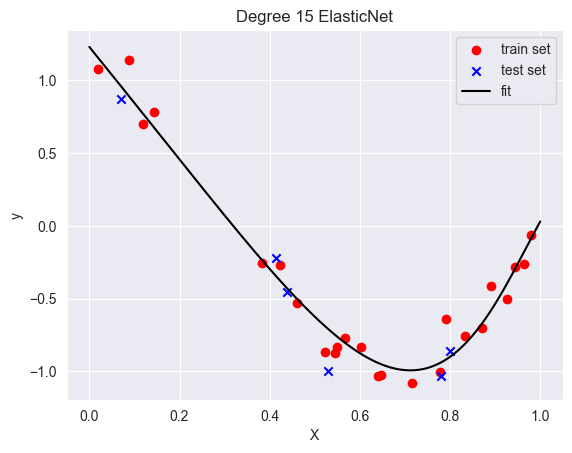

In [7]:
for name, y_pred_curve in predictions.items():
    plot_model(X_train, y_train, X_test, y_test, X_plot, y_pred_curve, name)

Problem 2. For this one, you shall be builduing a small full-cycle ML development pipeline.
You are provided with Boston Housing data, but you may find a dataset of your liking to use in place of the suggested one.

1. Load the Boston Housing dataset using sklearn.datasets.load_boston()
- Explore the dataset: check its shape, features, and basic statistics


2. Split the data into features (X) and target variable (y)
- Perform any necessary scaling or normalization of the features
- Split the data into training and testing sets

3. Choose at least two different regression models from scikit-learn (e.g., LinearRegression, RandomForestRegressor, Ridge, Lasso)
- Train each model on the training data

4. Make predictions on the test set using each model
- Calculate and compare the following metrics for each model:
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)

5. Visualize the predicted vs. actual values for each model

In [8]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
df = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']], columns=california_housing['feature_names'] + california_housing['target_names'])

In [10]:
df.shape

(20640, 9)

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

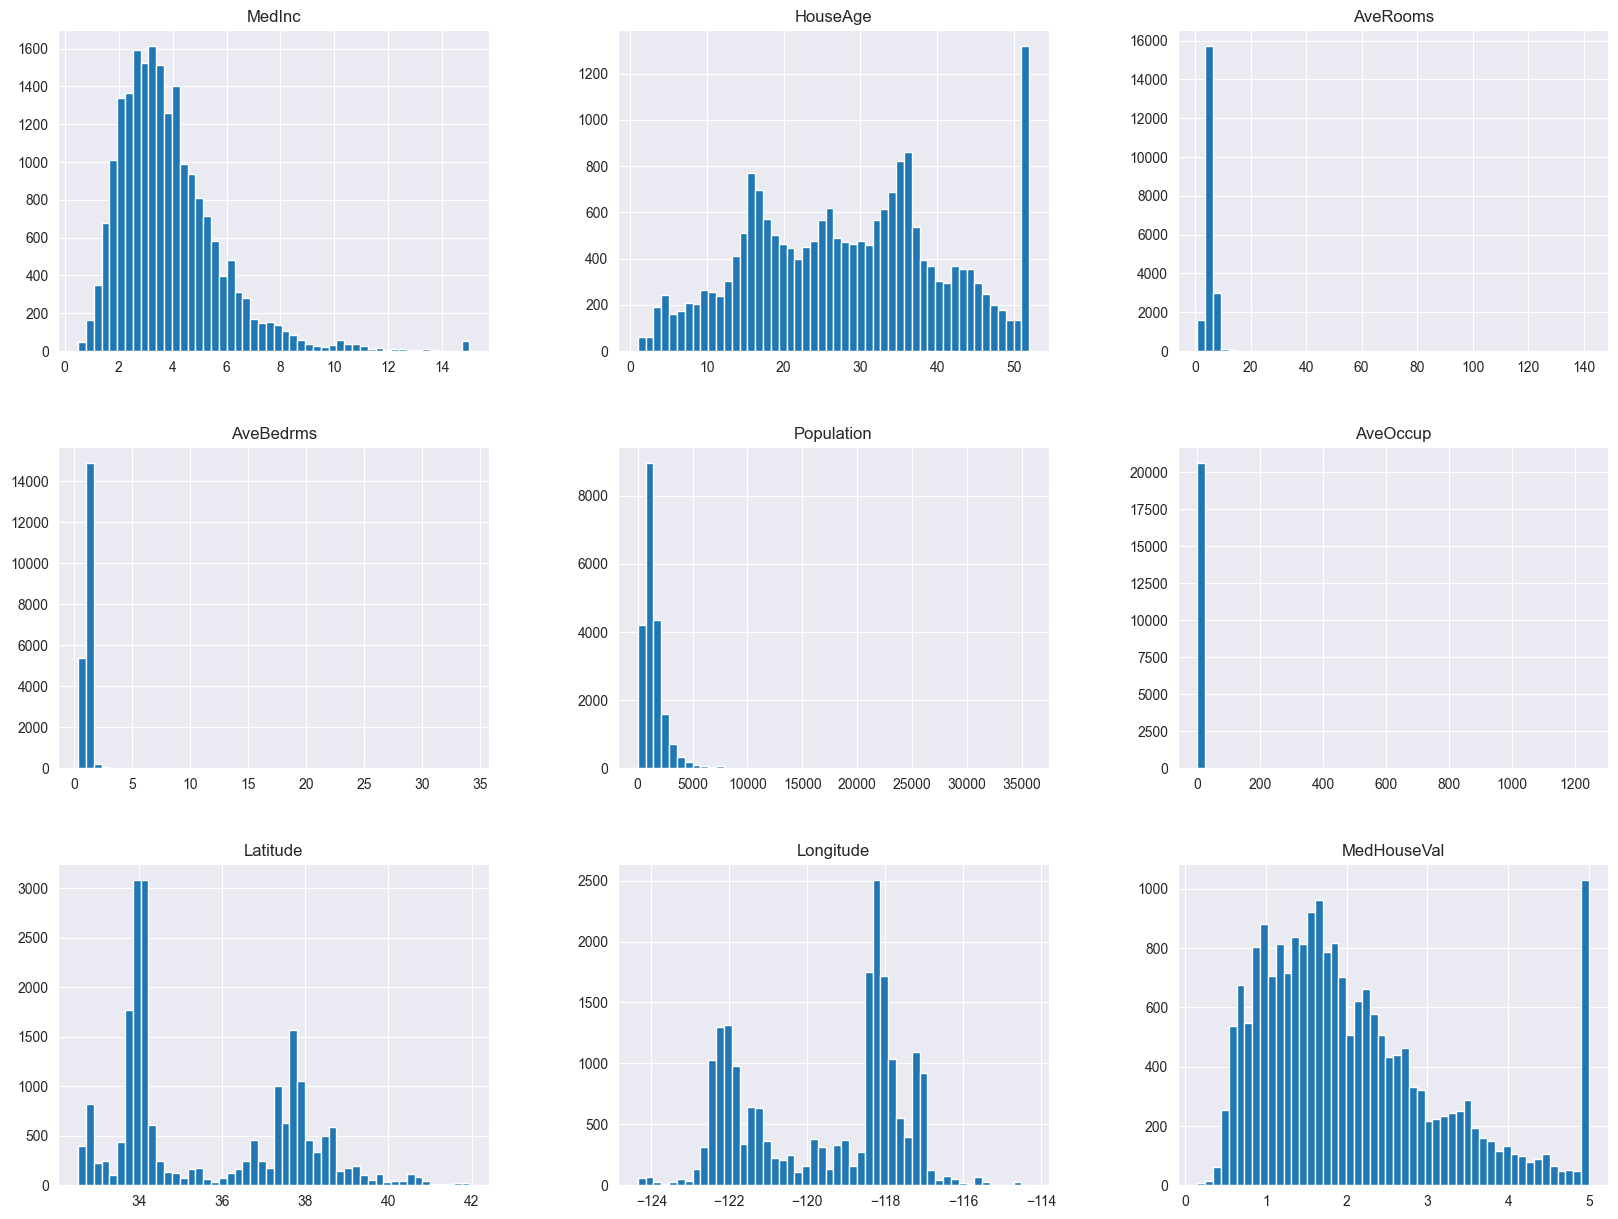

In [14]:
df.hist(figsize=(20, 15), bins=50)

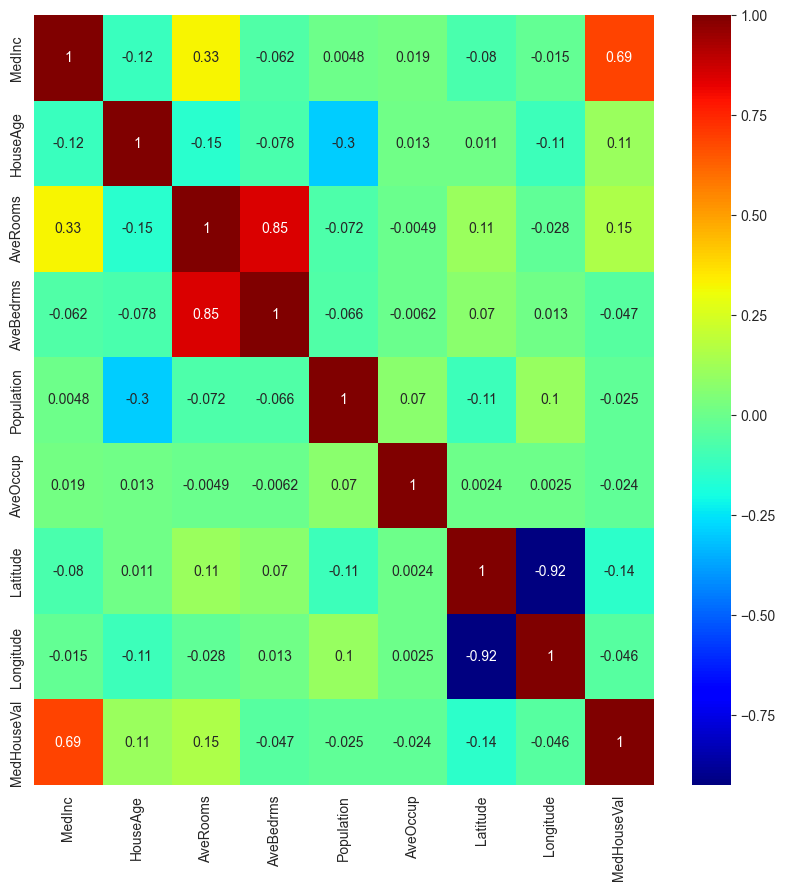

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="jet", cbar=True)
plt.show()

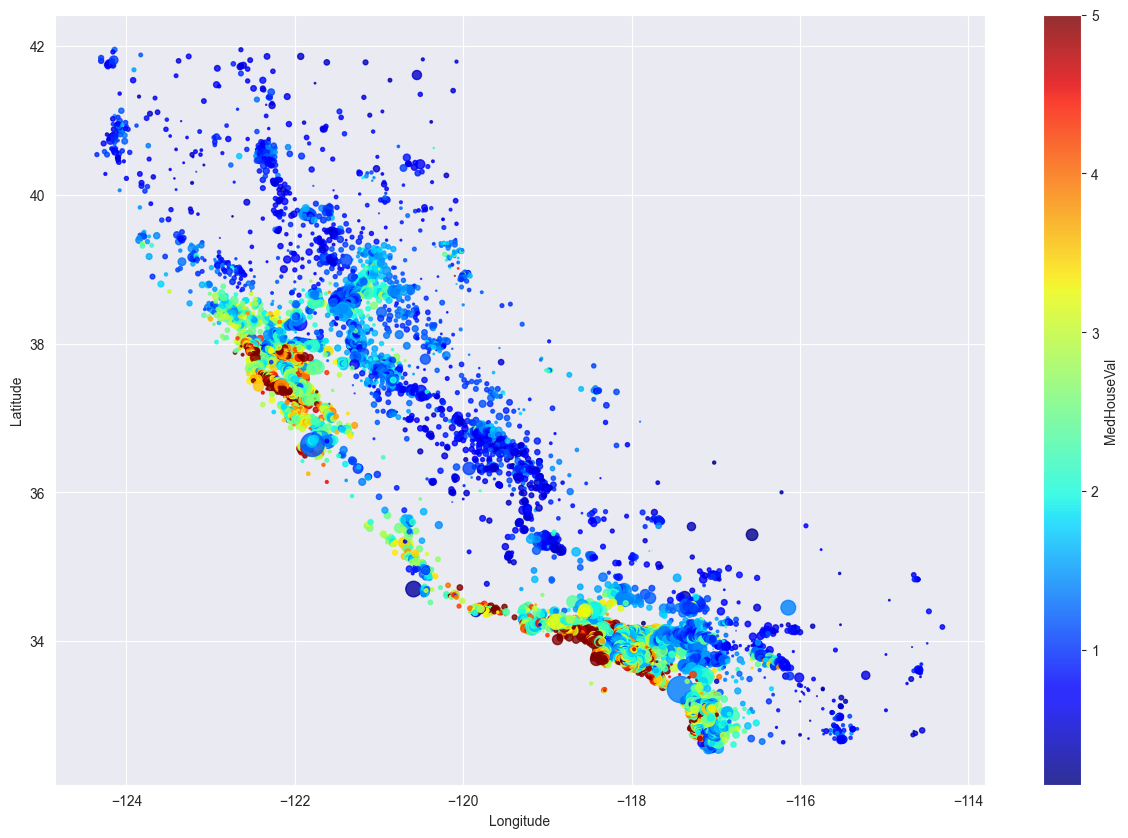

In [16]:
df.plot(
    x='Longitude',
    y='Latitude',
    c='MedHouseVal',
    kind='scatter',
    cmap='jet',
    alpha=0.8,
    colorbar=True,
    figsize=(15, 10),
    s=df['Population']/100
)
plt.show()

<Figure size 2500x1500 with 0 Axes>

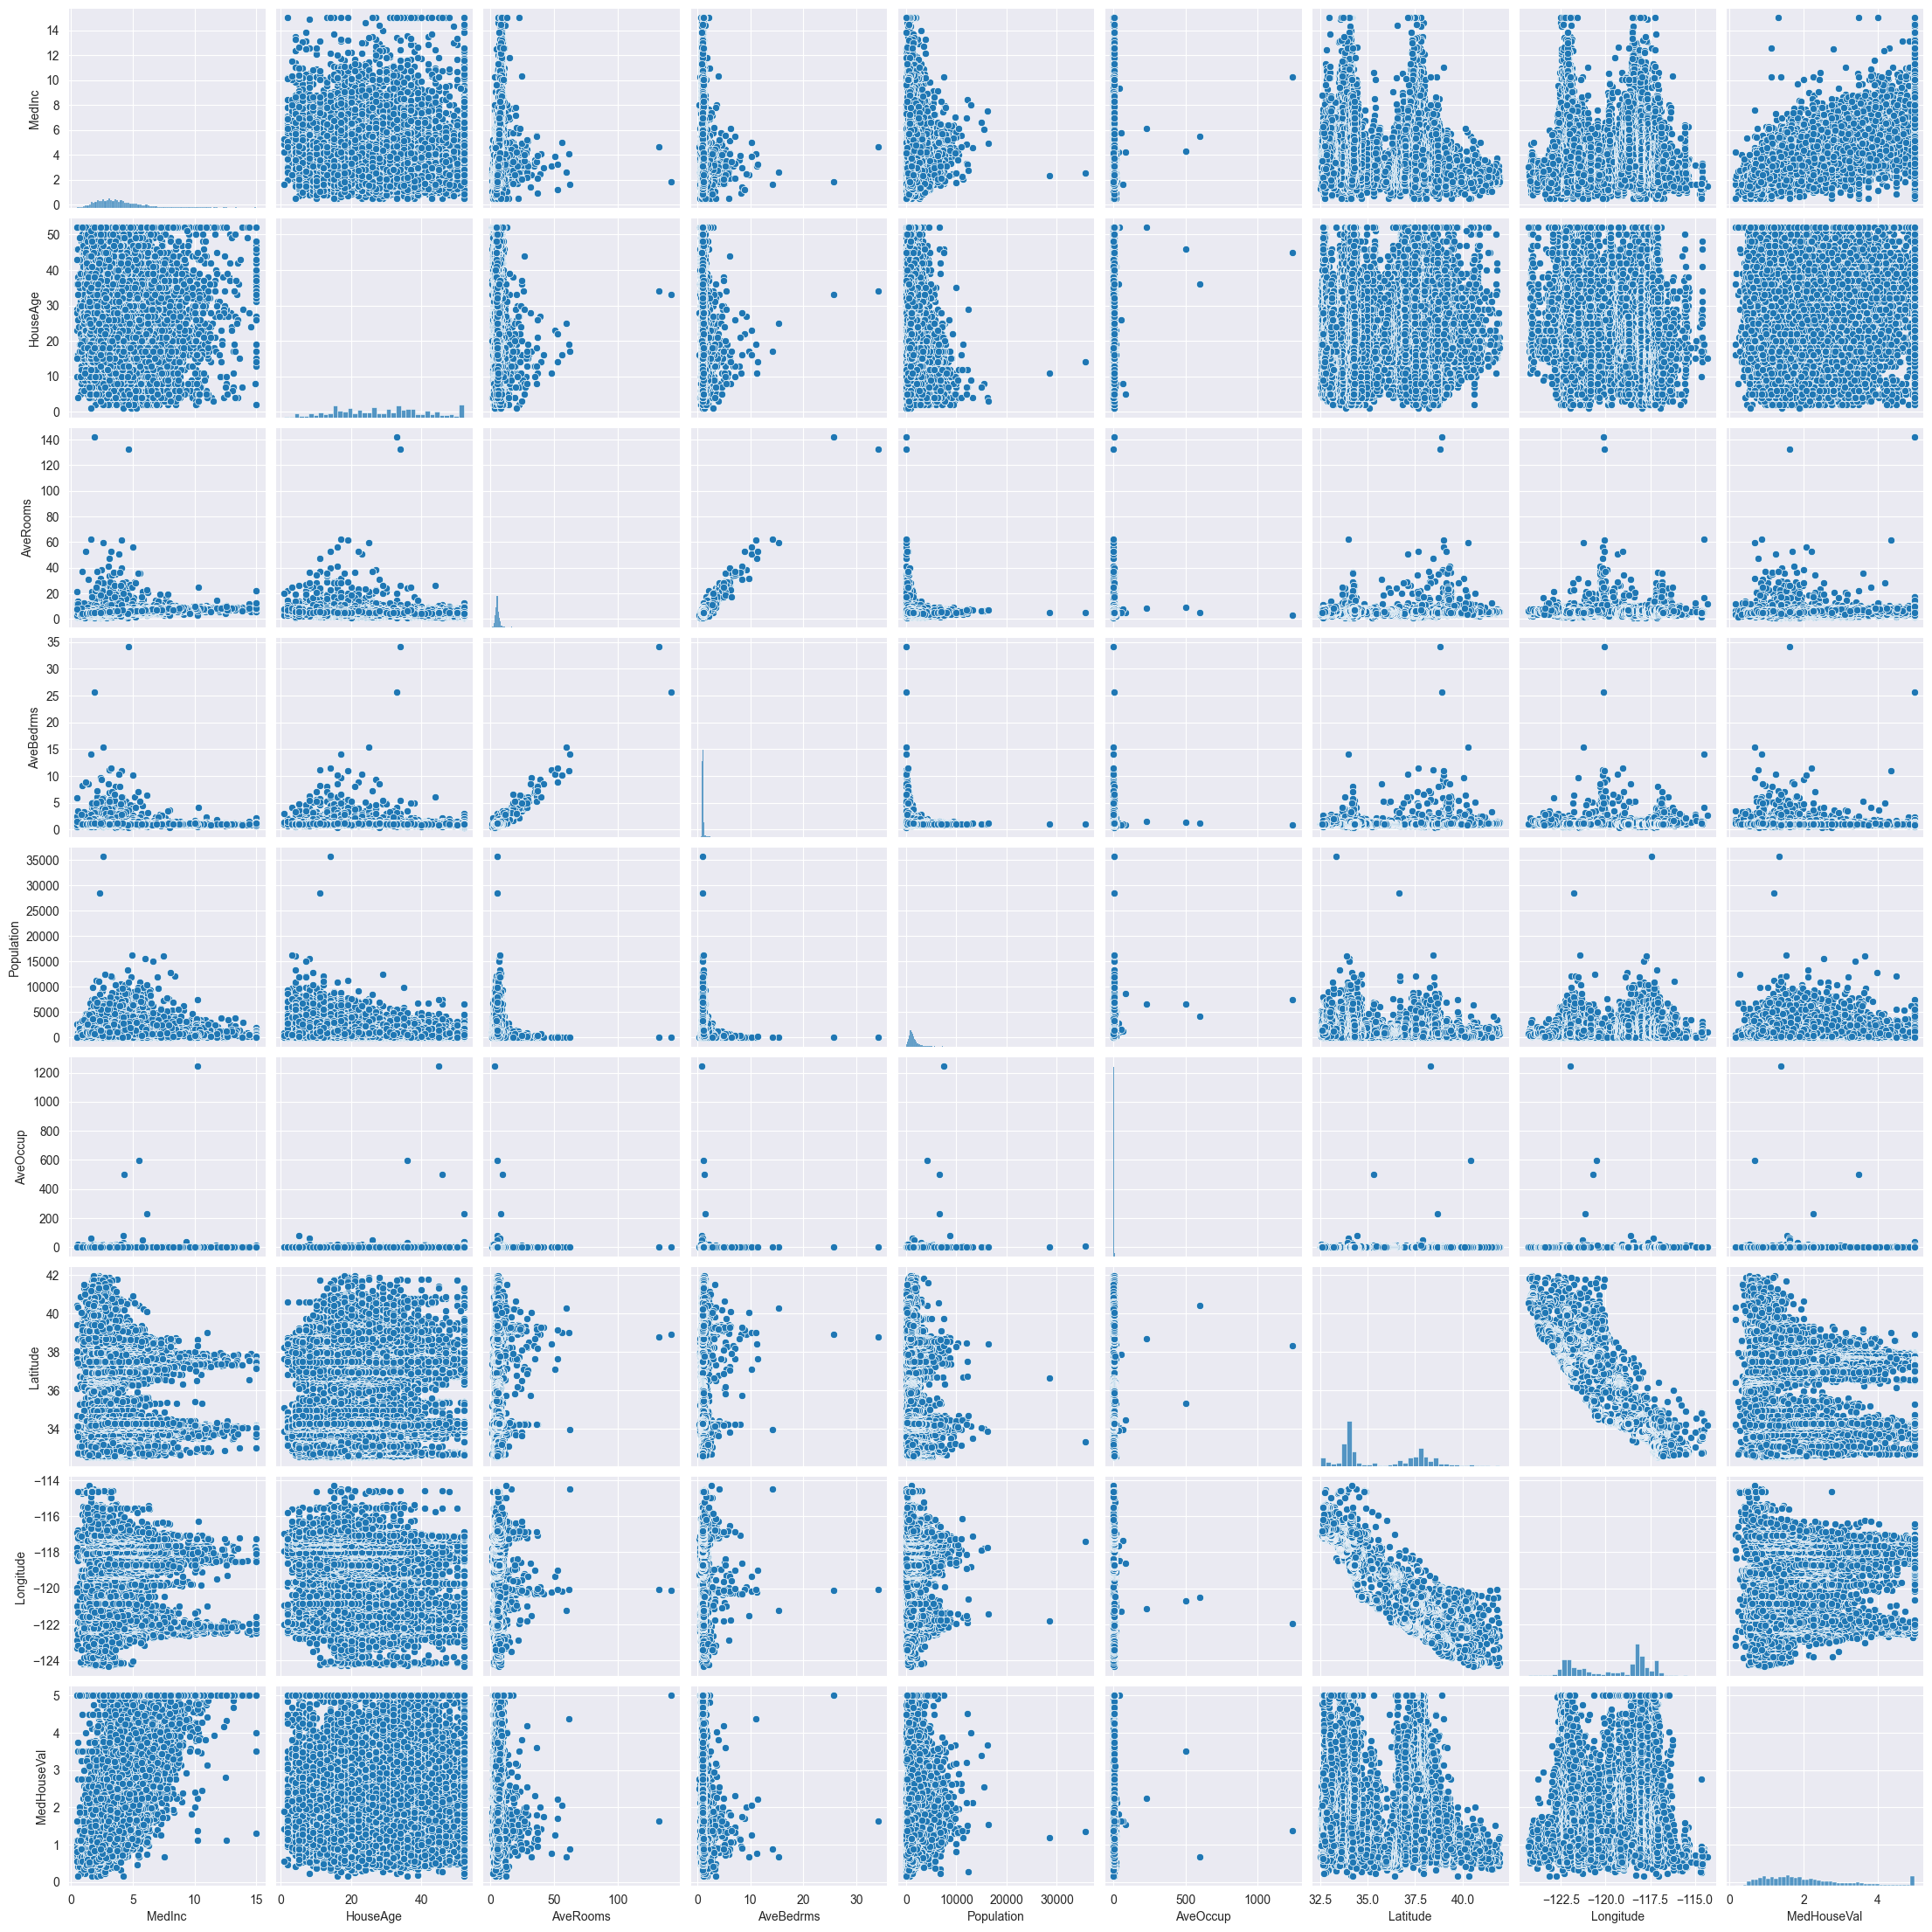

In [17]:
plt.figure(figsize=(25, 15))
sns.pairplot(df)
plt.show()

In [18]:
df_fe = df.copy()

df_fe["RoomsPerPerson"] = df_fe["AveRooms"] / df_fe["AveOccup"]
df_fe["BedrmsPerRoom"] = df_fe["AveBedrms"] / df_fe["AveRooms"]
df_fe["BedrmsPerPerson"] = df_fe["AveBedrms"] / df_fe["AveOccup"]
df_fe["PopulationPerHousehold"] = df_fe["Population"] / df_fe["AveOccup"]

df_fe.shape

(20640, 13)

In [19]:
df_fe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerPerson,BedrmsPerRoom,BedrmsPerPerson,PopulationPerHousehold
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,0.400621,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,0.460641,1138.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,0.383065,177.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,0.421147,219.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,0.495575,259.0


In [20]:
df_fe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerPerson,BedrmsPerRoom,BedrmsPerPerson,PopulationPerHousehold
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,1.976970,0.213075,0.403036,499.539680
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.146020,0.058023,0.242310,382.329753
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.002547,0.100000,0.000670,1.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.522382,0.175426,0.315656,280.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.937936,0.203181,0.372023,409.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.296090,0.239834,0.442652,605.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,55.222222,1.000000,14.194444,6082.000000


In [21]:
X = df_fe.drop('MedHouseVal', axis=1)
y = df_fe['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
models = {
    "LinearRegression": LinearRegression(),
    "LassoCV": LassoCV(),
    "RidgeCV": RidgeCV(),
    "RandomForest": RandomForestRegressor(),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
}

In [23]:
results = []
predictions = {}

for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({
        "Model": model_name,
        "R2": r2,
        "MSE": mse,
        "RMSE": np.sqrt(mse),
    })

    predictions[model_name] = y_pred

df_results = pd.DataFrame(results)
df_results

,Model,R2,MSE,RMSE
0,LinearRegression,0.653724,0.453763,0.673620
1,LassoCV,0.652736,0.455058,0.674580
2,RidgeCV,0.653713,0.453777,0.673630
3,RandomForest,0.805449,0.254942,0.504918
4,HistGradientBoostingRegressor,0.834021,0.217500,0.466369


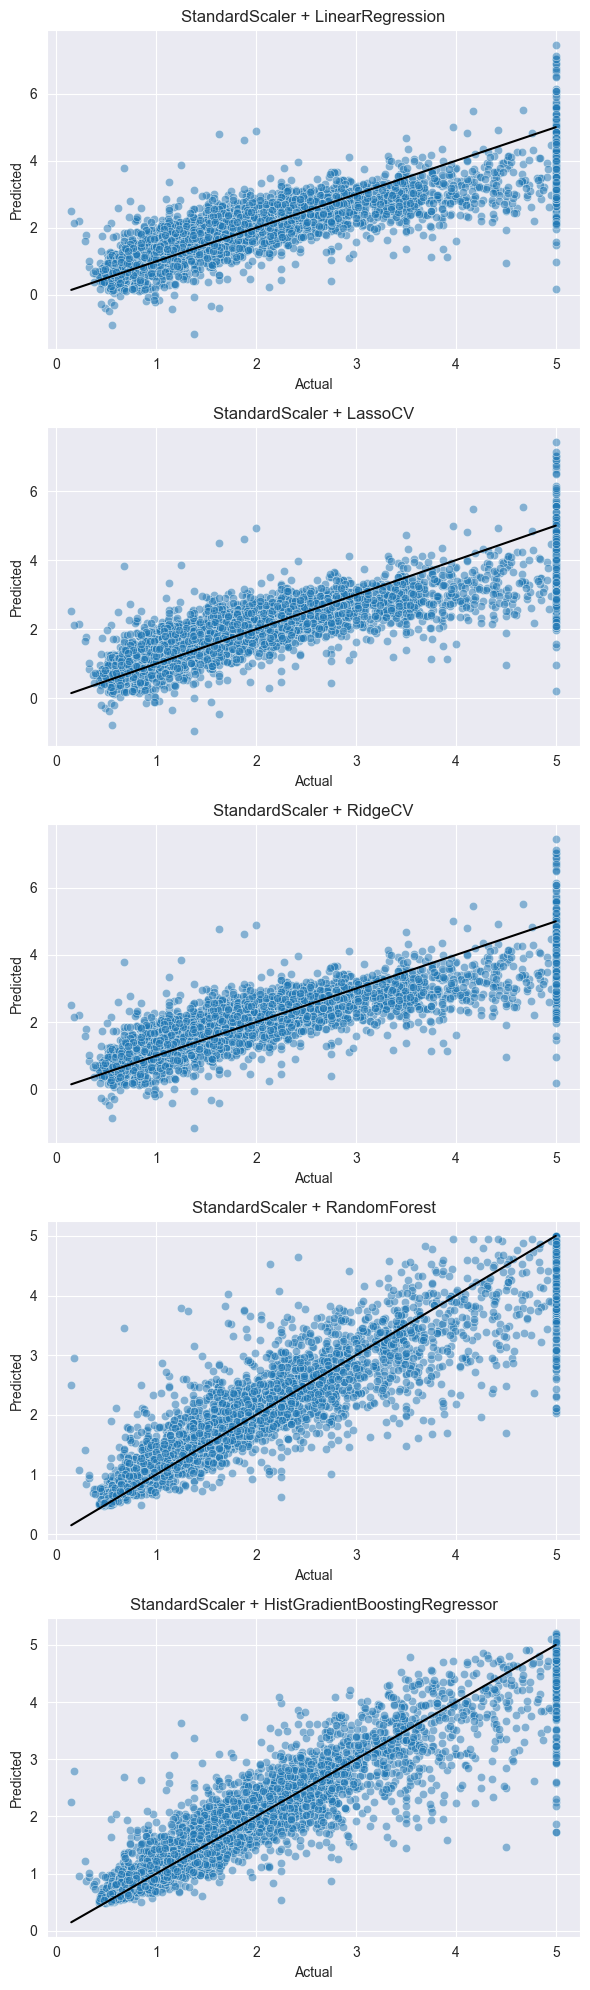

In [24]:
n_models = len(models)
fig, axes = plt.subplots(n_models, 1, figsize=(6, 4 * n_models))

y_min = y_test.min()
y_max = y_test.max()

for i, (model_name, y_pred) in enumerate(predictions.items()):
    ax = axes[i]
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=ax)
    ax.plot([y_min, y_max], [y_min, y_max], color='black')
    ax.set_title(f"StandardScaler + {model_name}")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")

plt.tight_layout()
plt.show()